<a href="https://colab.research.google.com/github/aizatbite/CDS503-ML-PROJECT/blob/main/ML_Project_503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre Processing

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Data: weatherAUS**

In [ ]:
rain = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
#Creating subset
rain_new=rain.iloc[0:50000] # first 50k
rain_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2011-08-30,Tuggeranong,4.3,16.0,0.0,NaN,NaN,N,28.0,NaN,N,0.0,11.0,76.0,42.0,1024.1,1021.0,NaN,NaN,8.4,15.0,No,No
49996,2011-08-31,Tuggeranong,1.2,17.0,0.0,NaN,NaN,NE,28.0,WNW,N,4.0,15.0,73.0,49.0,1025.3,1021.8,NaN,NaN,8.1,16.3,No,No
49997,2011-09-01,Tuggeranong,3.9,18.7,0.0,NaN,NaN,ESE,24.0,NW,ESE,4.0,11.0,69.0,31.0,1025.0,1022.0,NaN,NaN,10.9,18.4,No,No
49998,2011-09-02,Tuggeranong,1.3,16.4,0.0,NaN,NaN,SSW,28.0,S,E,13.0,9.0,57.0,40.0,1030.6,1027.0,NaN,NaN,8.7,15.9,No,No


In [ ]:
# View the number of rows and columns
rain_new.shape

(50000, 23)

Drop columns that have high NaN values and delete rows with NaN

In [ ]:
#Drop column
#Date&Location considered id, other than that because of high null values
rain_new = rain_new.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date', 'Location'],  axis = 1)
#delete rows with null values
rain_new.dropna(inplace=True)
rain_new

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2.9,17.3,0.0,WNW,35.0,N,WNW,13.0,22.0,56.0,38.0,1018.9,1017.4,11.3,15.8,No,No
49996,1.2,17.0,0.0,NE,28.0,WNW,N,4.0,15.0,73.0,49.0,1025.3,1021.8,8.1,16.3,No,No
49997,3.9,18.7,0.0,ESE,24.0,NW,ESE,4.0,11.0,69.0,31.0,1025.0,1022.0,10.9,18.4,No,No
49998,1.3,16.4,0.0,SSW,28.0,S,E,13.0,9.0,57.0,40.0,1030.6,1027.0,8.7,15.9,No,No


In [ ]:
rain_new.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
#Checking null values
rain_new.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Null values are cleared

Removing Outliers

In [ ]:
# Detecting outliers with IQR
Q1 = rain_new.quantile(0.25)
Q3 = rain_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           8.8
MaxTemp           8.1
Rainfall          0.8
WindGustSpeed    17.0
WindSpeed9am     11.0
WindSpeed3pm     11.0
Humidity9am      24.0
Humidity3pm      31.0
Pressure9am       9.0
Pressure3pm       9.0
Temp9am           7.7
Temp3pm           7.8
dtype: float64


In [ ]:
# Removing outliers from dataset
rain_new = rain_new[~((rain_new < (Q1 - 1.5 * IQR)) |(rain_new > (Q3 + 1.5 * IQR))).any(axis=1)]
rain_new.shape

(27849, 17)

Number of rows dropped from 10000 to 6508 after removing unnecessary columns, removing null values & outliers

Change non numerical to numerical so ML model able to read

In [ ]:
# Create LabelEncoder
le = preprocessing.LabelEncoder()
# Convert string categories into numbers for RainToday and RainTomorrow
rain_new['RainToday'] = le.fit_transform(rain_new['RainToday'])
rain_new['RainTomorrow'] = le.fit_transform(rain_new['RainTomorrow'])
rain_new['WindGustDir'] = le.fit_transform(rain_new['WindGustDir'])
rain_new['WindDir9am'] = le.fit_transform(rain_new['WindDir9am'])
rain_new['WindDir3pm'] = le.fit_transform(rain_new['WindDir3pm'])
rain_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2.9,17.3,0.0,14,35.0,3,14,13.0,22.0,56.0,38.0,1018.9,1017.4,11.3,15.8,0,0
49996,1.2,17.0,0.0,4,28.0,14,3,4.0,15.0,73.0,49.0,1025.3,1021.8,8.1,16.3,0,0
49997,3.9,18.7,0.0,2,24.0,7,2,4.0,11.0,69.0,31.0,1025.0,1022.0,10.9,18.4,0,0
49998,1.3,16.4,0.0,11,28.0,8,0,13.0,9.0,57.0,40.0,1030.6,1027.0,8.7,15.9,0,0


Scaling data

In [ ]:
# define standard scaler
scaler = StandardScaler()
# transform data
rain_newstd = scaler.fit_transform(rain_new)
print(rain_newstd)

[[ 0.16864969 -0.13219512  1.19413978 ... -0.07532938 -0.23076099
  -0.43440283]
 [-0.83030287  0.24589895 -0.37924564 ...  0.36809279 -0.23076099
  -0.43440283]
 [ 0.08540365  0.34901551 -0.37924564 ...  0.17298703 -0.23076099
  -0.43440283]
 ...
 [-1.4130252  -0.85401107 -0.37924564 ... -0.67838354 -0.23076099
  -0.43440283]
 [-1.84590464 -1.24929123 -0.37924564 ... -1.12180571 -0.23076099
  -0.43440283]
 [-2.51187301 -0.88838325 -0.37924564 ... -0.74933109 -0.23076099
  -0.43440283]]


Visualizing data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


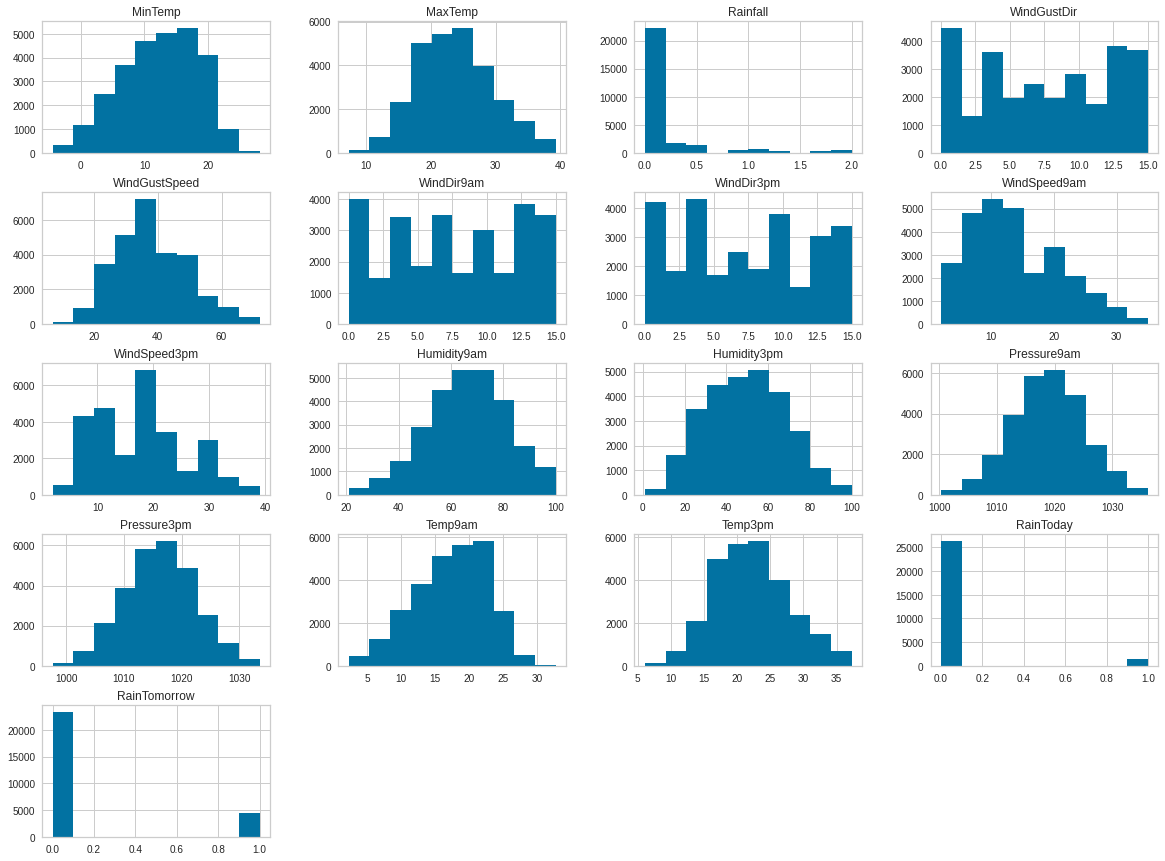

In [ ]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
rain_new.hist(ax=ax)
plt.show()

Aduh RainToday ada satu je unique value bila ambil 10k data

In [ ]:
list(set(rain_new.RainToday))
list(rain_new['RainToday'].unique())

[0, 1]

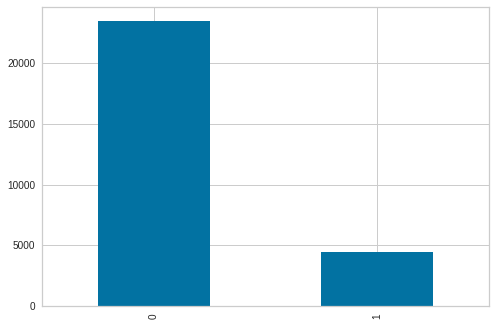

In [ ]:
# Plot a bar chart based on count of each label 
# Data not balanced
rain_new['RainTomorrow'].value_counts().plot(kind='bar')

In [ ]:
# Target column
target = rain_new['RainTomorrow']

# Features column
features = rain_new.drop('RainTomorrow', axis = 1)

In [ ]:
dummy = DummyClassifier (strategy = "uniform")

# Train model
dummy.fit( features, target)

# Accuracy scores
scores = dummy.score(features, target) 
 
# Print scores
scores

0.4991920715286007

Apply SMOTE pada training set only - mai & youtube

Text(0.5, 1.0, 'Outcome ytrain (Without SMOTE)')

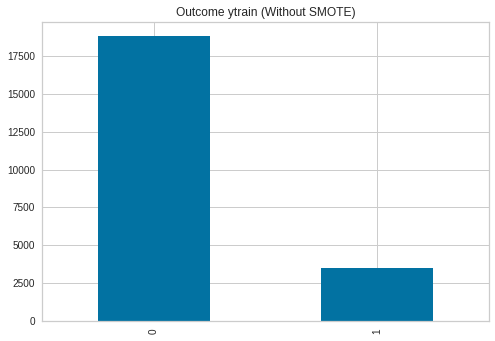

In [ ]:
# Split dataset in training and test datasets 
x, x_test, y, y_test = train_test_split(features,target,test_size=0.2,random_state=80)

# Split the dataset into training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

#Split and generate imbalance test/train set
class_nobalance = pd.Series(y_train).value_counts().plot.bar()
class_nobalance.set_title("Outcome ytrain (Without SMOTE)")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Outcome ytrain (SMOTE)')

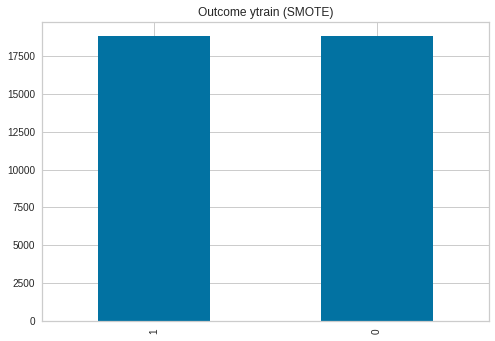

In [ ]:
#Split and generate balance test/train set using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
x_train_new, y_train_new = sm.fit_sample(x, y.ravel())
class_balance = pd.Series(y_train_new).value_counts().plot.bar()
class_balance.set_title("Outcome ytrain (SMOTE)")

In [ ]:
#Split and generate balance test/train set using SMOTE
sm_dev = SMOTE(random_state = 22)
x_dev_new, y_dev_new = sm.fit_sample(x_dev, y_dev.ravel())
class_balance = pd.Series(y_dev_new).value_counts().plot.bar()
class_balance.set_title("Outcome ytrain (SMOTE)")

Now our dataset are cleaned and balanced!

## Pairplot

##KNN


In [ ]:
# Training a KNN model
# Create a KNN classifier with k = 1
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='brute')

# Train the model using the training set
knn.fit(x_train_new, y_train_new)

# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(knn, x_train_new, y_train_new, cv = 10, scoring = 'accuracy')

# Print scores
scores

array([0.91030077, 0.91589034, 0.92307692, 0.91163162, 0.91267306,
       0.91932907, 0.90788072, 0.90761448, 0.91267306, 0.91187433])

In [ ]:
# Predict the target for the development dataset
dev_predict = knn.predict(x_test)
dev_predict

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
# Evaluate the knn model on development set
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, dev_predict))

Accuracy (Test):  0.7757630161579893


Tune Parameter KNN

In [ ]:
# Create a KNN classifier with k = 5
knn = KNeighborsClassifier(n_neighbors = 24)
# Train the model using the training set
knn.fit(x_train_new, y_train_new)
# Predict the target for the development set
dev_predict = knn.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))

Accuracy:  0.7341113105924596


In [ ]:
# Print confusion matrix
print(confusion_matrix(y_test, dev_predict))

# Print precision, recall and F1
print(classification_report(y_test, dev_predict))

[[3422 1224]
 [ 257  667]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      4646
           1       0.35      0.72      0.47       924

    accuracy                           0.73      5570
   macro avg       0.64      0.73      0.65      5570
weighted avg       0.83      0.73      0.76      5570



## Decision Tree

In [ ]:
# Training a decision tree model

# Create a decision tree classifier with default parameters
dtree = DecisionTreeClassifier(criterion='entropy', splitter = 'random')

# Train the model using the training set
dtree.fit(x_train_new, y_train_new)

# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(dtree, x_train_new, y_train_new, cv = 10, scoring = 'accuracy')

# Print scores
scores

array([0.82246473, 0.82326324, 0.86105936, 0.85733298, 0.86208733,
       0.86022364, 0.85756124, 0.86528222, 0.86368477, 0.86687966])

In [ ]:
# Predict the target for the development dataset
dev_predict = dtree.predict(x_test)
dev_predict

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# Print confusion matrix
print(confusion_matrix(y_test, dev_predict))

# Print precision, recall and F1
print(classification_report(y_test, dev_predict))

[[3850  796]
 [ 513  411]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4646
           1       0.34      0.44      0.39       924

    accuracy                           0.76      5570
   macro avg       0.61      0.64      0.62      5570
weighted avg       0.79      0.76      0.78      5570



Tune Parameter

In [ ]:
# Create a decision tree classifier with criterion = entropy and max_depth = 3
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Train the model using the training set
dtree.fit(x_train, y_train)

# Predict the target for the development dataset
dev_predict = dtree.predict(x_test)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))

Accuracy:  0.8552962298025135


Visualization

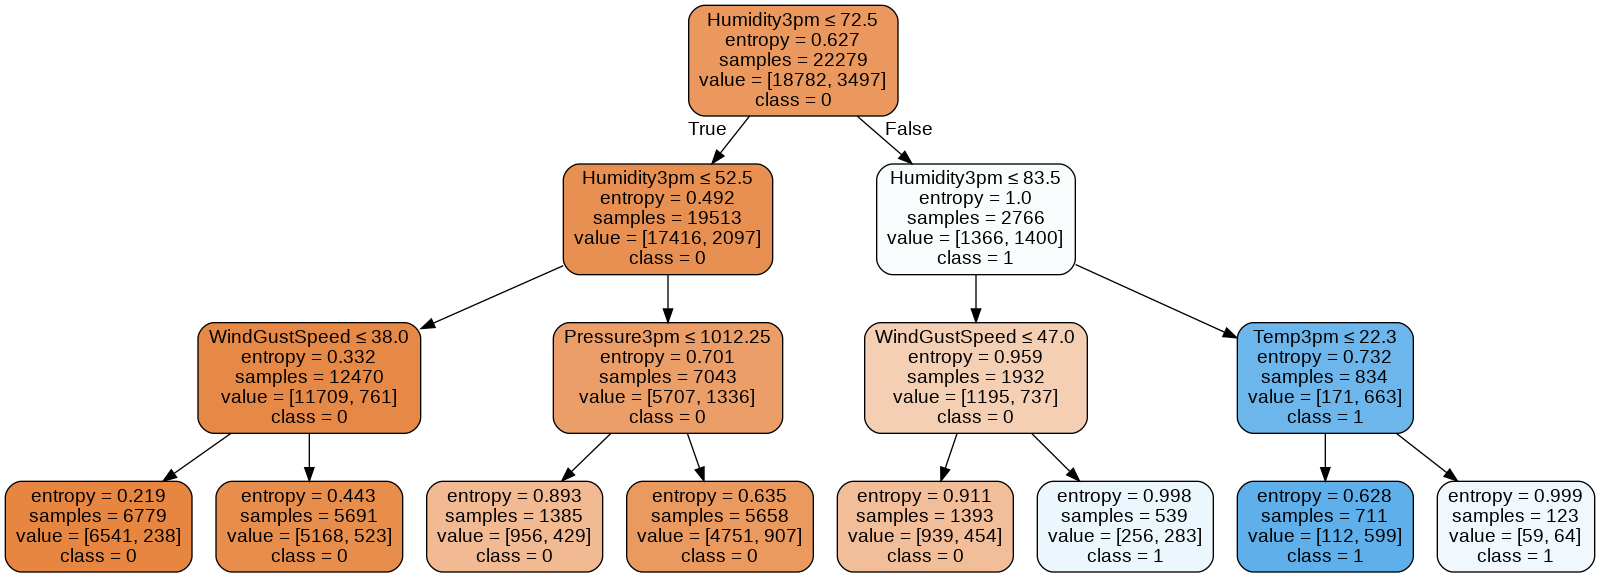

In [ ]:
# Load required libraries
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

# Visualize decision tree
dot_data = StringIO()
tree.export_graphviz(dtree,
                     out_file = dot_data,
                     class_names = ['0', '1'], # name of each of the target classes in asce
                     feature_names = features.columns, # the feature names.
                     filled = True, # whether to fill in the boxes with colors.
                     rounded = True, # whether to round the corners of the boxes.
                     special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# Load export_text library
from sklearn.tree.export import export_text
tree_rules = export_text(dtree, feature_names=list(x_train))

# Print deccision tree rules
print(tree_rules)

|--- Humidity3pm <= 72.50
|   |--- Humidity3pm <= 52.50
|   |   |--- WindGustSpeed <= 38.00
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  38.00
|   |   |   |--- class: 0
|   |--- Humidity3pm >  52.50
|   |   |--- Pressure3pm <= 1012.25
|   |   |   |--- class: 0
|   |   |--- Pressure3pm >  1012.25
|   |   |   |--- class: 0
|--- Humidity3pm >  72.50
|   |--- Humidity3pm <= 83.50
|   |   |--- WindGustSpeed <= 47.00
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  47.00
|   |   |   |--- class: 1
|   |--- Humidity3pm >  83.50
|   |   |--- Temp3pm <= 22.30
|   |   |   |--- class: 1
|   |   |--- Temp3pm >  22.30
|   |   |   |--- class: 1



## Naive Bayes

### Gaussian

In [ ]:
# Create a Gaussian Naive Bayes classifier with default parameters
gnb = GaussianNB()
# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(gnb, x_train_new, y_train_new, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
scores

array([0.70934256, 0.70774554, 0.73063615, 0.7239819 , 0.7127263 ,
       0.73189563, 0.72257721, 0.71618743, 0.71592119, 0.7100639 ])

In [ ]:
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

Accuracy (Validation) = 0.7181077820514237


In [ ]:
# Running prediction
gnb.fit(x_train_new, y_train_new)
# Predict the target for the test dataset
test_predict = gnb.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.7368043087971274


### Bernoulli

In [ ]:
# Create a Bernoulli Naive Bayes classifier with default parameters
bnb = BernoulliNB(binarize = 0.0)
# Use 10-fold cross validation to perform training and validation on the training set
scores = cross_val_score(bnb, x_train_new, y_train_new, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
scores


array([0.57945169, 0.58690445, 0.67474048, 0.67261113, 0.67625133,
       0.68051118, 0.67784878, 0.65894569, 0.6799787 , 0.65921193])

In [ ]:
# Print the mean accuracy score
print('Accuracy =', scores.mean())

Accuracy = 0.6546455349375522


In [ ]:
# Running prediction
bnb.fit(x_train_new, y_train_new)
# Predict the target for the test dataset
test_predict = bnb.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.767145421903052


# Feature Selection

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. The benefit of performing feature selection is as below:


1.   Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

2.   Improves Accuracy: Less misleading data means modeling accuracy improves.

3.   Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

4.   Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

5.   Improve interpretation: as model complexity is reduced, it is easier to interpret

A simple covariance matrix method via the Spearman rank correlation coefficient is adopted for the feature selection method 

In [ ]:
# To find the correlation among the columns using pearson method
import seaborn as sns
corr=rain_new.corr(method ='pearson')
corr

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.665325,0.081253,-0.194322,0.302582,-0.090129,-0.235031,0.246077,0.224725,-0.103819,0.220469,-0.423153,-0.385556,0.900209,0.630106,0.052507,0.127483
MaxTemp,0.665325,1.000000,-0.125047,-0.226375,0.180401,-0.260912,-0.177085,-0.004651,0.033172,-0.312767,-0.374995,-0.380251,-0.441619,0.830424,0.979864,-0.082594,-0.079360
Rainfall,0.081253,-0.125047,1.000000,0.041034,0.054984,0.084769,0.026110,0.067628,0.055848,0.234395,0.223447,-0.061568,-0.018510,-0.025890,-0.128735,0.852107,0.138552
WindGustDir,-0.194322,-0.226375,0.041034,1.000000,0.144200,0.377825,0.555587,0.057342,0.081102,-0.104683,-0.092769,-0.162302,-0.100002,-0.217238,-0.229283,0.032108,-0.001597
WindGustSpeed,0.302582,0.180401,0.054984,0.144200,1.000000,0.018639,0.121348,0.456296,0.652555,-0.290564,-0.030450,-0.435432,-0.401562,0.300600,0.137105,0.041511,0.159587
WindDir9am,-0.090129,-0.260912,0.084769,0.377825,0.018639,1.000000,0.228676,0.018123,0.073239,0.008815,0.105638,-0.009163,0.061495,-0.169702,-0.261601,0.058496,0.001400
WindDir3pm,-0.235031,-0.177085,0.026110,0.555587,0.121348,0.228676,1.000000,0.057060,0.056970,-0.114484,-0.210770,-0.150954,-0.086863,-0.232958,-0.168544,0.024938,-0.037352
WindSpeed9am,0.246077,-0.004651,0.067628,0.057342,0.456296,0.018123,0.057060,1.000000,0.353521,-0.308024,0.018458,-0.127793,-0.067084,0.174195,-0.015180,0.049792,0.053974
WindSpeed3pm,0.224725,0.033172,0.055848,0.081102,0.652555,0.073239,0.056970,0.353521,1.000000,-0.147515,0.114889,-0.262974,-0.219771,0.222843,0.003977,0.037195,0.046220
Humidity9am,-0.103819,-0.312767,0.234395,-0.104683,-0.290564,0.008815,-0.114484,-0.308024,-0.147515,1.000000,0.576454,0.186081,0.185117,-0.307095,-0.305569,0.159810,0.187373


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


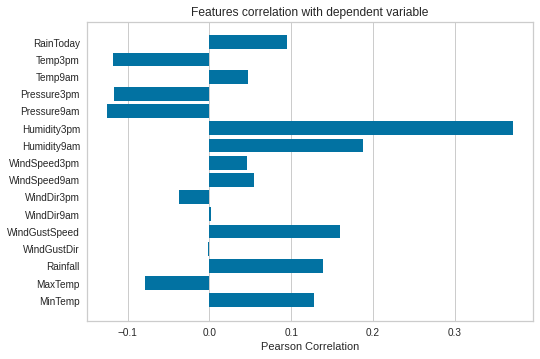

In [ ]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(features.columns)
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(features, target)
visualizer.poof()

# **4. Ensemble Learning**

# BAGGING

In [ ]:
# Create the base classifier

knn = KNeighborsClassifier(n_neighbors = 24)
bnb = BernoulliNB(binarize = 0.0)
dtree = DecisionTreeClassifier(criterion='entropy', splitter = 'random')

bases = [knn, bnb, dtree]

# Create the bagging classifier
for base in bases:
  model_bagging = BaggingClassifier(base_estimator = base, n_estimators = 10, random_state = 0)
  # Use 10-fold cross validation to perform training and validation on the training set
  # Parameter scoring = 'accuracy' will compute accuracy
  scores = cross_val_score(model_bagging, x_train_new, y_train_new, cv = 10, scoring = 'accuracy')
  # Display the array containing accuracy from 10 folds or iterations
  print(base)
  # Print the mean accuracy score
  print('Accuracy (Validation) =', scores.mean())

  # Running prediction
  model_bagging.fit(x_train_new, y_train_new)
  # Predict the target for the test dataset
  test_predict = model_bagging.predict(x_test)
  # Compute the model accuracy on the test set
  print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

  print('-'*60)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')
Accuracy (Validation) = 0.8705955512524195
Accuracy (Test):  0.859245960502693
------------------------------------------------------------
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Accuracy (Validation) = 0.8430360541711442
Accuracy (Test):  0.8341113105924596
------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')
Accuracy (Validation) = 0.86

# BOOSTING

In [ ]:
# Create the base classifier
bnb = BernoulliNB(binarize = 0.0)
dtree = DecisionTreeClassifier(criterion='entropy', splitter = 'random')

bases = [bnb, dtree]
for base in bases:
  # Create the AdaBoost classifier
  model_boosting = AdaBoostClassifier(base_estimator = base, n_estimators = 10, random_state = 0)
  # Use 10-fold cross validation to perform training and validation on the training set
  # Parameter scoring = 'accuracy' will compute accuracy
  scores = cross_val_score(model_boosting, x_train_new, y_train_new, cv = 10, scoring = 'accuracy')
  # Display the array containing accuracy from 10 folds or iterations
  print('base: ',base)
  print(scores)
  # Print the mean accuracy score
  print('Accuracy (Validation) =', scores.mean())

  model_boosting.fit(x_train_new, y_train_new)
  # Predict the target for the test dataset
  test_predict = model_boosting.predict(x_test)
  # Compute the model accuracy on the test set
  print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))
  print('-'*60)

base:  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
[0.15664273 0.15664273 0.15709156 0.15709156 0.15709156 0.15709156
 0.15709156 0.15709156 0.15709156 0.15671307]
Accuracy (Validation) = 0.15696394582885576
Accuracy (Test):  0.1658886894075404
------------------------------------------------------------
base:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')
[0.78815081 0.8043088  0.80520646 0.80610413 0.81014363 0.79712747
 0.81149013 0.80745063 0.80655296 0.80871127]
Accuracy (Validation) = 0.8045246279744511
Accuracy (Test):  0.8053859964093357
-----------------------------------

# VOTING

In [ ]:
# Create the base classifiers
knn = KNeighborsClassifier(n_neighbors = 24)
bnb = BernoulliNB(binarize = 0.0)
dtree = DecisionTreeClassifier(criterion='entropy', splitter = 'random')
# Create VotingClassifier
model_voting = VotingClassifier(estimators = [('bnb', bnb), ('dtree', dtree), ('knn', knn)], voting = 'hard')
# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(model_voting, x_train_new, y_train_new, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
print(scores)
print('-'*60)
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

# Running prediction
model_voting.fit(x_train_new, y_train_new)
# Predict the target for the test dataset
test_predict = model_voting.predict(x_test)
# Compute the model accuracy on the test set
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

[0.86535009 0.86535009 0.86669659 0.86894075 0.87208259 0.86400359
 0.86131059 0.86535009 0.86400359 0.86933094]
------------------------------------------------------------
Accuracy (Validation) = 0.8662418909756948
Accuracy (Test):  0.8535008976660682


# STACKING

In [ ]:
# Create the base classifiers
knn = KNeighborsClassifier(n_neighbors = 24)
bnb = BernoulliNB(binarize = 0.0)
dtree = DecisionTreeClassifier(criterion='entropy', splitter = 'random')

final_estimator = [knn, bnb, dtree]

for final_estimator in final_estimator:
  # Create StackingClassifier
  model_stacking = StackingClassifier(estimators = [('gnb', gnb), ('dtree', dtree), ('knn', knn)], final_estimator = final_estimator)
  # Use 10-fold cross validation to perform training and validation on the training set
  # Parameter scoring = 'accuracy' will compute accuracy
  scores = cross_val_score(model_stacking, x_train_new, y_train_new, cv = 10, scoring = 'accuracy')
  # Display the array containing accuracy from 10 folds or iterations
  print(estimator)
  # Print the mean accuracy score
  print('Accuracy (Validation) =', scores.mean())
  # Running prediction
  model_stacking.fit(x_train_new, y_train_new)
  # Predict the target for the test dataset
  test_predict = model_stacking.predict(x_test)
  # Compute the model accuracy on the test set
  print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))
  print('-'*60)

NameError: ignored